Importamos librerias


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
# output estable, para producibilidad
np.random.seed(42)

Importar dataset

In [79]:
df = pd.read_csv('/Users/lihao/Downloads/dataset.csv')

# primeras líneas
print(df.head())

   id  product_A_sold_in_the_past  product_B_sold_in_the_past  \
0   1                    -0.25992                    -0.34794   
1   2                    -0.25992                    -0.28599   
2   3                    -0.25992                    -0.18998   
3   4                     0.65945                     3.35306   
4   5                    -0.25992                    -0.24623   

   product_A_recommended  product_A  product_C  product_D  cust_hitrate  \
0                -0.1097    -0.0891   -0.02372   -0.04247       0.12643   
1                -0.1097    -0.0891   -0.02372   -0.04247       0.42465   
2                -0.1097    -0.0891   -0.02372   -0.04247       0.72559   
3                -0.1097    -0.0891   -0.02372   -0.04247       1.55091   
4                -0.1097    -0.0891   -0.02372   -0.04247      -0.50193   

   cust_interactions  cust_contracts  opp_month  opp_old  competitor_Z  \
0            0.30731        -0.34997   -1.41464 -0.28185             0   
1         

Info

In [80]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35899 entries, 0 to 35898
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          35899 non-null  int64  
 1   product_A_sold_in_the_past  35899 non-null  float64
 2   product_B_sold_in_the_past  35899 non-null  float64
 3   product_A_recommended       35899 non-null  float64
 4   product_A                   35899 non-null  float64
 5   product_C                   35899 non-null  float64
 6   product_D                   35899 non-null  float64
 7   cust_hitrate                35899 non-null  float64
 8   cust_interactions           35899 non-null  float64
 9   cust_contracts              35899 non-null  float64
 10  opp_month                   35899 non-null  float64
 11  opp_old                     35899 non-null  float64
 12  competitor_Z                35899 non-null  int64  
 13  competitor_X                358

Definir X para las variables explicativas y Y como label

In [81]:
X = df
# quitamos la target_variable
X = X.iloc[:, :-1]
# quitamos la columna id
X = X.drop(columns=['id'])
y = df['target_variable']
print(y.value_counts())

target_variable
0    19009
1    16890
Name: count, dtype: int64


Parece que más o menos hay una cantidad equilibrada de Win y Loss

Obtenemos los conjuntos de Train y Test. Pondremos 30 % para el Test

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
X.shape, y.shape

((35899, 15), (35899,))

Probaremos con los modelos de Regressión Logística para poder luego interpretar las variables explicativas

In [83]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

c:\Users\lihao\OneDrive\桌面\UNI\2n\Q3\IAA\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Veamos a ver que tal:

In [84]:
y_pred_lr = model_lr.predict(X_test)

# Curba de ROC
y_proba_lr = model_lr.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f'Logistic Regression ROC AUC: {roc_auc_lr:.4f}')

Logistic Regression ROC AUC: 0.6784


Métricas

In [85]:
# presición
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.4f}')
#recall
recall_lr = classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall']
print(f'Logistic Regression Recall: {recall_lr:.4f}')
# valor f1
f1_lr = classification_report(y_test, y_pred_lr, output_dict=True)['1']['f1-score']
print(f'Logistic Regression F1 Score: {f1_lr:.4f}')

Logistic Regression Accuracy: 0.6279
Logistic Regression Recall: 0.5294
Logistic Regression F1 Score: 0.5761


Matriz de Confución

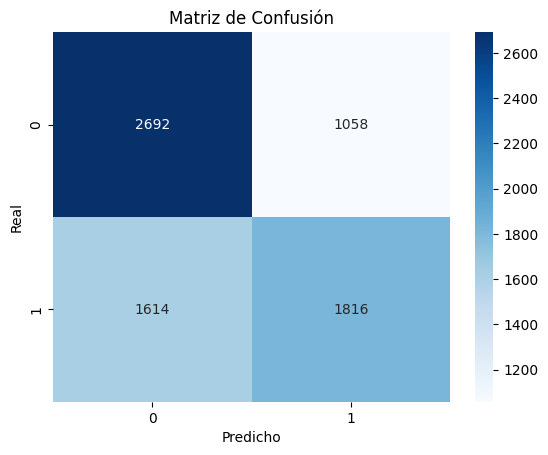

In [86]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

Informe del clasificador

In [87]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67      3750
           1       0.63      0.53      0.58      3430

    accuracy                           0.63      7180
   macro avg       0.63      0.62      0.62      7180
weighted avg       0.63      0.63      0.62      7180



No llega al mínimo de f1 >= 0.7

Eliminamos features que sirvan de poco usando Feature Engineering

In [88]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

c:\Users\lihao\OneDrive\桌面\UNI\2n\Q3\IAA\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Probamos de ajustar el umbral de predicción

In [89]:
from sklearn.metrics import f1_score

# Obtener probabilidades
model.fit(X_train, y_train) 
y_proba = model.predict_proba(X_test)[:, 1]

# Probar distintos umbrales
umbrales = np.arange(0.1, 0.9, 0.05)
f1_scores = [f1_score(y_test, y_proba >= t) for t in umbrales]

mejor_umbral = umbrales[np.argmax(f1_scores)]
mejor_f1 = max(f1_scores)

print(f"Mejor umbral: {mejor_umbral:.2f} → F1: {mejor_f1:.3f}")

# Usar ese umbral para predecir
y_pred_ajustado = (y_proba >= mejor_umbral).astype(int)

c:\Users\lihao\OneDrive\桌面\UNI\2n\Q3\IAA\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mejor umbral: 0.35 → F1: 0.663


Matriz de confusión con el umbral actualizado

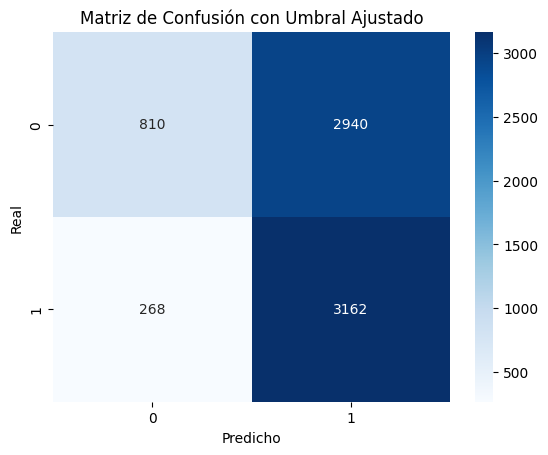

              precision    recall  f1-score   support

           0       0.75      0.22      0.34      3750
           1       0.52      0.92      0.66      3430

    accuracy                           0.55      7180
   macro avg       0.63      0.57      0.50      7180
weighted avg       0.64      0.55      0.49      7180



In [90]:
cm = confusion_matrix(y_test, y_pred_ajustado)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión con Umbral Ajustado')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

print(classification_report(y_test, y_pred_ajustado))